In [1]:
import numpy as np
from keras import Input
from keras.layers import Embedding, LSTM, Dense, concatenate
from keras.models import Model
from keras.utils import to_categorical
from plot_util import show_model

Using TensorFlow backend.


In [2]:
TEXT_VOCAB_SIZE = 10000
QUESTION_VOCAB_SIZE = 10000
ANSWER_VOCAB_SIZE = 500

In [3]:
text_input = Input(shape=(None, ), dtype='int32', name='text')
embedded_text = Embedding(TEXT_VOCAB_SIZE, 64)(text_input)
encoded_text = LSTM(32)(embedded_text)

question_input = Input(shape=(None, ), dtype='int32', name='question')
embedded_question = Embedding(QUESTION_VOCAB_SIZE, 32)(question_input)
encoded_question = LSTM(16)(embedded_question)

concatenated = concatenate([encoded_text, encoded_question], axis=-1)
answer = Dense(ANSWER_VOCAB_SIZE, activation='sigmoid')(concatenated)

model = Model([text_input, question_input], answer)

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

Instructions for updating:
Colocations handled automatically by placer.


In [4]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
text (InputLayer)               (None, None)         0                                            
__________________________________________________________________________________________________
question (InputLayer)           (None, None)         0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, None, 64)     640000      text[0][0]                       
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, None, 32)     320000      question[0][0]                   
__________________________________________________________________________________________________
lstm_1 (LS

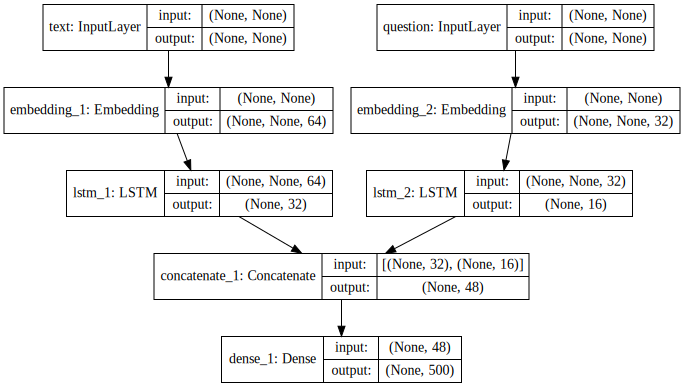

In [5]:
show_model(model)

In [6]:
NUM_SAMPLES = 1000
MAXLEN = 100

text = np.random.randint(1, TEXT_VOCAB_SIZE, size=(NUM_SAMPLES, MAXLEN))
question = np.random.randint(1, QUESTION_VOCAB_SIZE, size=(NUM_SAMPLES, MAXLEN))
answers = np.random.randint(ANSWER_VOCAB_SIZE, size=(NUM_SAMPLES))
answers = to_categorical(answers, ANSWER_VOCAB_SIZE)

In [7]:
# history = model.fit([text, question], answers, epochs=10, batch_size=128)
history = model.fit(
    {'text': text, 'question': question}, answers, 
    epochs=5, batch_size=128, verbose=2
)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
 - 3s - loss: 6.2145 - acc: 1.0000e-03
Epoch 2/5
 - 1s - loss: 6.2066 - acc: 0.0370
Epoch 3/5
 - 1s - loss: 6.1666 - acc: 0.0060
Epoch 4/5
 - 1s - loss: 6.1050 - acc: 0.0040
Epoch 5/5
 - 1s - loss: 6.0586 - acc: 0.0040
